In [32]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


#players = ["1","3","83","86","85","6","11","88","106","89","84","5","8","76","77","87","82","96","12","17","80","33","16"]
#players = [1,3,83,86,85,6,11,88,106,89,84,5,8,76,77,87,82,96,12,17,80,33,16]
actors = ["n1","n3","n83","n86","n85","n6","n11","n88","n106","n89","n84","n5","n8","n76","n77","n87","n82","n96","n12","n17","n80","n33","n16"]

phases = {}
G = {}
DiG = {}
for i in range(1,12): 
  var_name = "phase" + str(i)
  file_name = "data\\" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = [0])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  G[i] = nx.from_pandas_adjacency(phases[i])
  DiG[i] = nx.from_pandas_adjacency(phases[i],create_using=nx.DiGraph)
  G[i].name = var_name
  DiG[i].name = "Directed " + var_name

In [34]:
for i in range(1,12):
    print(G[i])
print("\n")
for i in range(1,12):
    print(DiG[i])

Graph named 'phase1' with 15 nodes and 18 edges
Graph named 'phase2' with 24 nodes and 28 edges
Graph named 'phase3' with 33 nodes and 56 edges
Graph named 'phase4' with 33 nodes and 48 edges
Graph named 'phase5' with 32 nodes and 39 edges
Graph named 'phase6' with 27 nodes and 47 edges
Graph named 'phase7' with 36 nodes and 49 edges
Graph named 'phase8' with 42 nodes and 58 edges
Graph named 'phase9' with 34 nodes and 44 edges
Graph named 'phase10' with 42 nodes and 50 edges
Graph named 'phase11' with 41 nodes and 50 edges


DiGraph named 'Directed phase1' with 15 nodes and 26 edges
DiGraph named 'Directed phase2' with 24 nodes and 35 edges
DiGraph named 'Directed phase3' with 33 nodes and 68 edges
DiGraph named 'Directed phase4' with 33 nodes and 65 edges
DiGraph named 'Directed phase5' with 32 nodes and 50 edges
DiGraph named 'Directed phase6' with 27 nodes and 68 edges
DiGraph named 'Directed phase7' with 36 nodes and 63 edges
DiGraph named 'Directed phase8' with 42 nodes and 75 ed

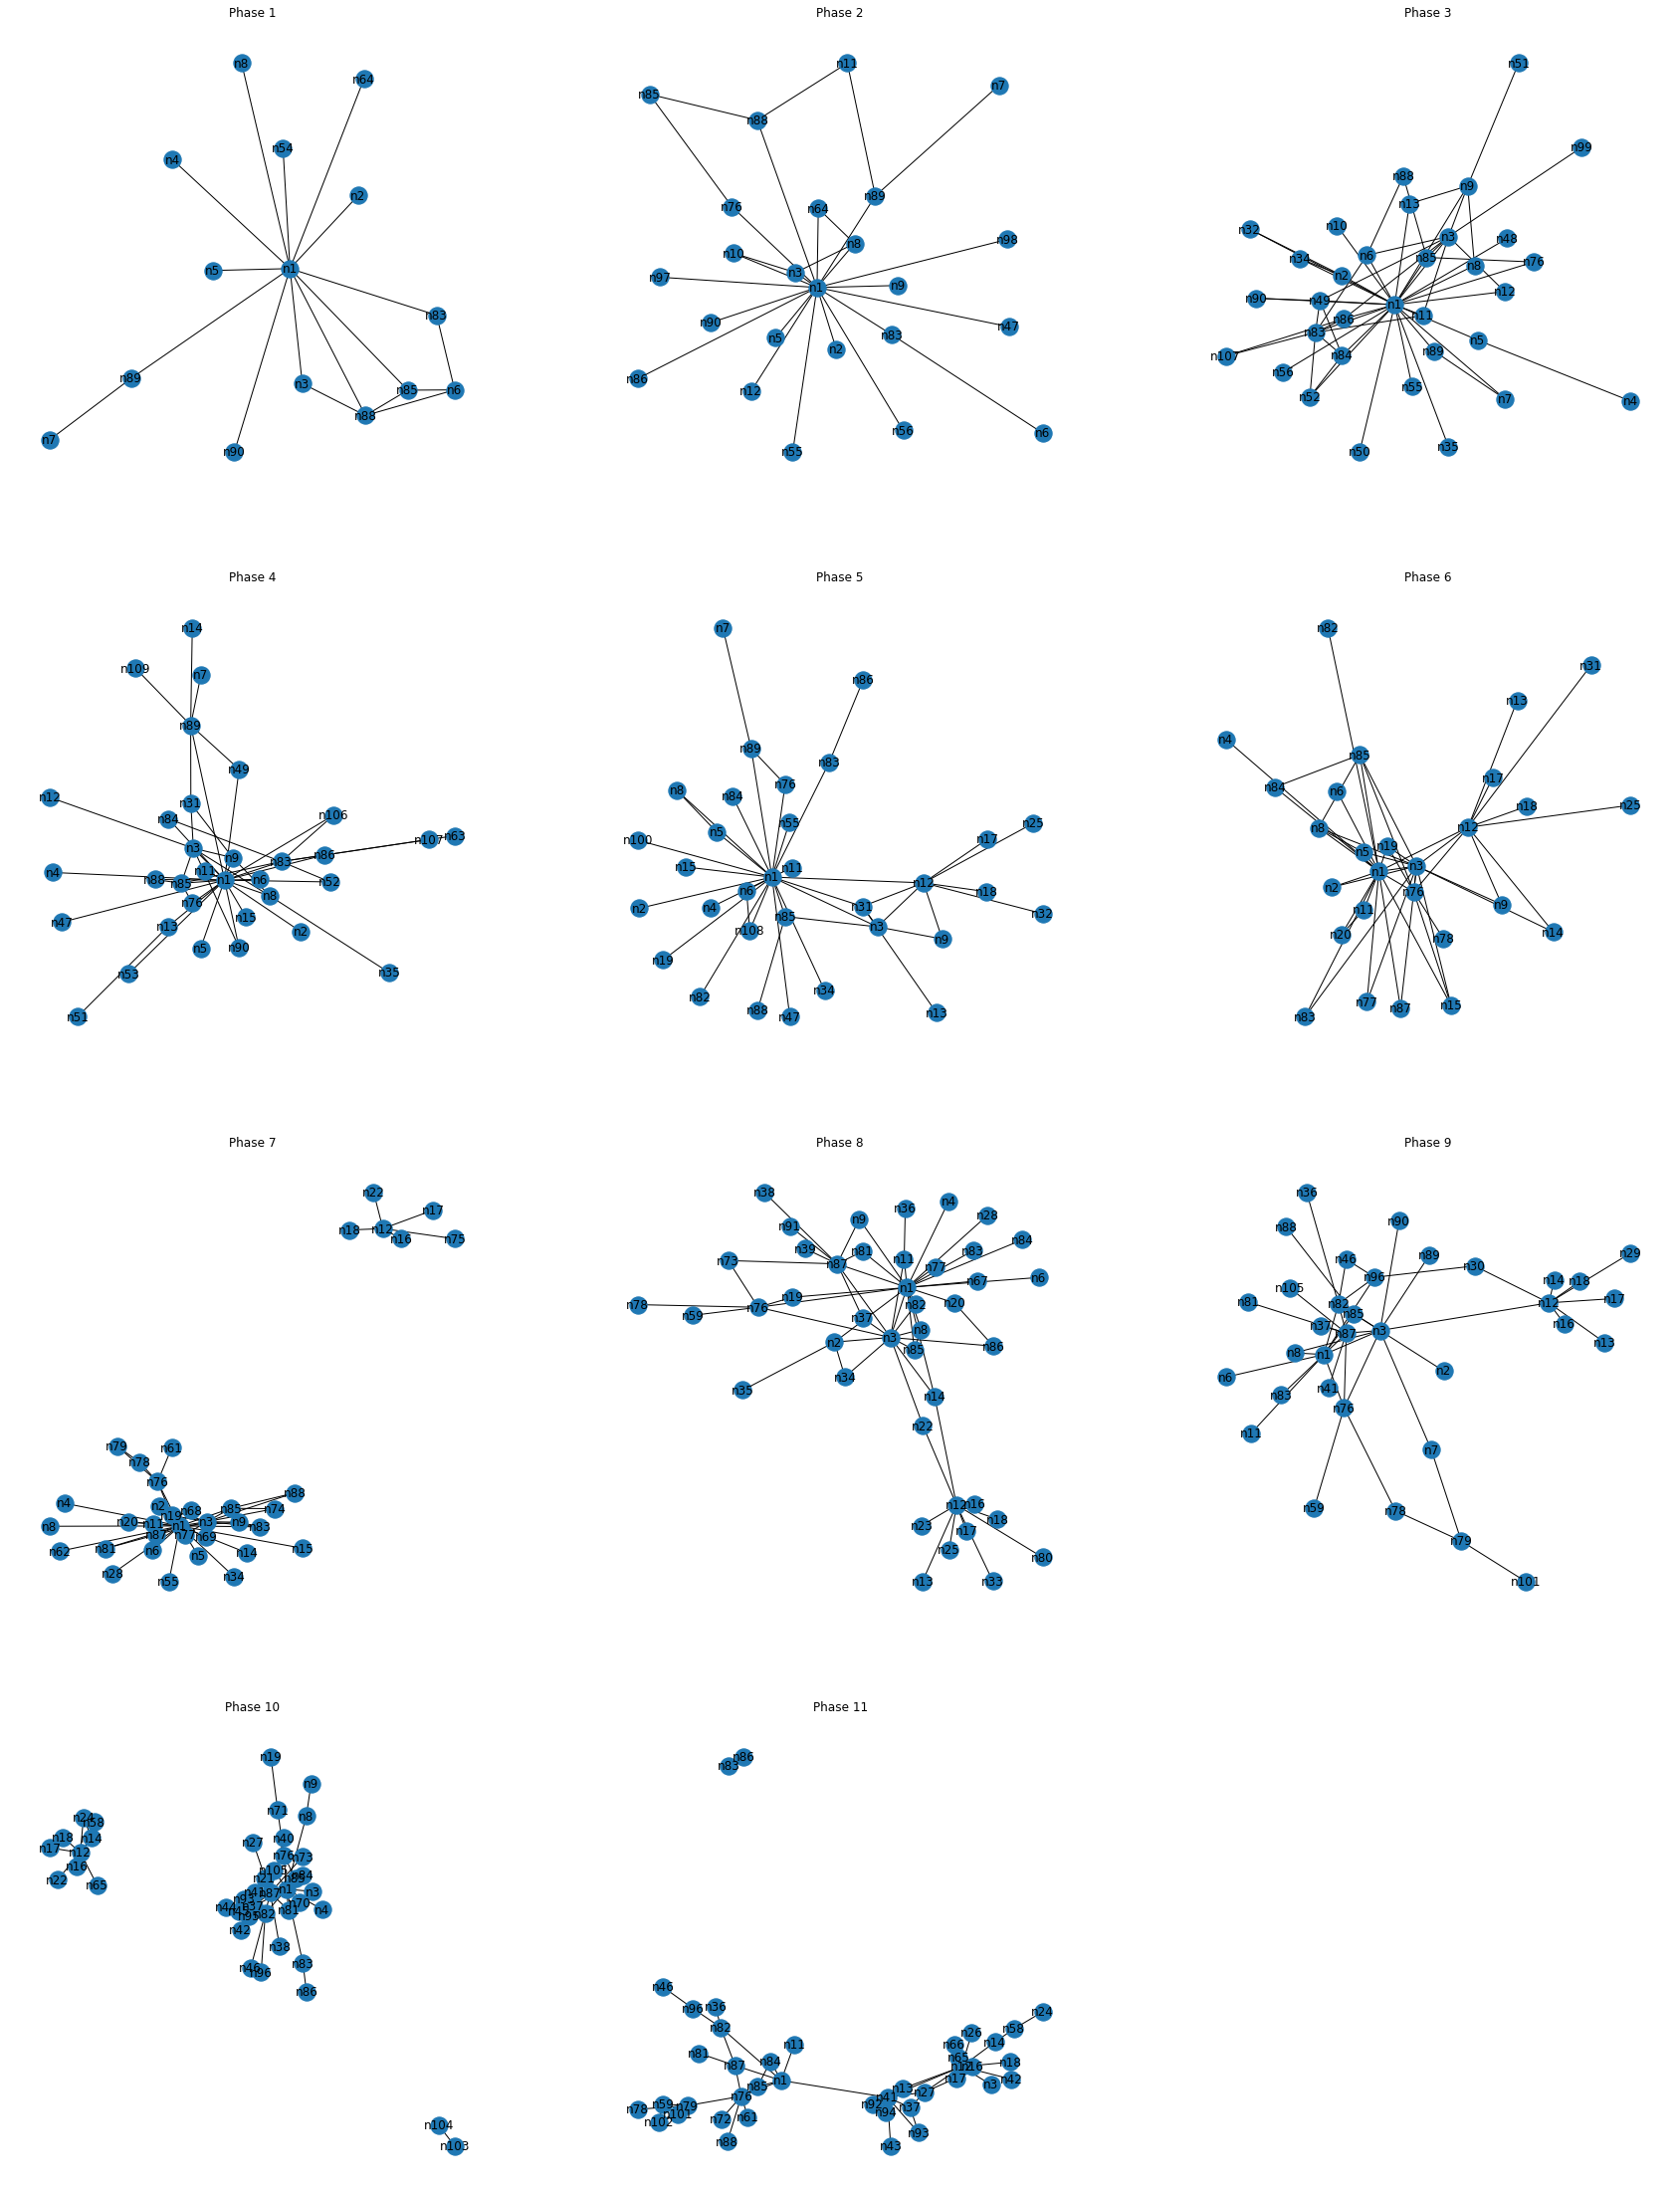

In [3]:
fig=plt.figure(figsize=(30,40))
for _ in range(1,12):
    plt.subplot(4,3,_)
    
    plt.title(f"Phase {_}")
    nx.draw(G[_],with_labels=True)
plt.show()


### The number of nodes rises rapidly in the first few phases as:
1) No seizures have been made yet so the criminals may be more willing to add new members (i.e. the gang is growing unhindered)
2) The early wiretaps may only involve a small part of the gang at that time. As new wiretaps are added more and more of the gang becomes visible (i.e. the gang is mature but we don't see it all)

### This calls the validity of average centrality metrics into question:
1) If the early wiretaps just showed a small section of the gang, the members of this section will appear more central than they actually are

In [4]:
#normalised_degree_centrality = []
n_d_c=[]
n_b_c=[] #normalised_betweenness_centrality
n_e_c=[] #normalised_eigenvector_centrality
for phase in range(1,12):
    degrees = list(G[phase].degree())
    d = {}
    for node,k in degrees:
        d[node] = k/(G[phase].number_of_nodes()-1)
    n_d_c.append(d)
    n_b_c.append(nx.betweenness_centrality(G[phase],normalized=True))
    n_e_c.append(nx.eigenvector_centrality(G[phase]))
        
    

In [5]:
#n_d_c
for _ in ["n1","n3","n12","n83"]:
    print(f"{_} {n_d_c[2][_]:.4f} {n_d_c[8][_]:.4f}")

n1 0.8438 0.3030
n3 0.2812 0.3333
n12 0.0625 0.2424
n83 0.2500 0.0303


In [6]:
#n_b_c
for _ in ["n1","n3","n12","n83"]:
    print(f"{_} {n_b_c[2][_]:.4f} {n_b_c[8][_]:.4f}")

n1 0.8295 0.2491
n3 0.0955 0.5762
n12 0.0000 0.3573
n83 0.0466 0.0000


In [7]:
#normalised_eigenvector_centrality
for _ in ["n1","n3","n12","n83"]:
    print(f"{_} {n_e_c[2][_]:.4f} {n_e_c[8][_]:.4f}")

n1 0.5939 0.4590
n3 0.2913 0.4680
n12 0.1360 0.1407
n83 0.2775 0.0918


In [8]:
#calculate  mean centralities
mean_nbc = {}
mean_nec = {}
for actor in actors:
    mu_nbc = 0
    mu_nec = 0

    for phase in range(1,12):
        mu_nbc+=n_b_c[phase-1].get(actor,0)
        mu_nec+=n_e_c[phase-1].get(actor,0)
    mean_nbc[actor] = mu_nbc/11.0
    mean_nec[actor] = mu_nec/11.0


In [9]:
sorted_nbc =dict(sorted(mean_nbc.items(), key=lambda item: item[1], reverse=True))
print(sorted_nbc)

{'n1': 0.655050992293228, 'n12': 0.16756212382251084, 'n3': 0.12940285961873224, 'n76': 0.08379132554240724, 'n87': 0.06132692752337006, 'n89': 0.04794845425622871, 'n83': 0.031784565037010895, 'n82': 0.029196391038131618, 'n85': 0.023733070994913123, 'n88': 0.012435413517588706, 'n8': 0.009169798115377987, 'n96': 0.007856316663134844, 'n86': 0.007043977200350133, 'n5': 0.005681818181818182, 'n11': 0.005106777700095339, 'n6': 0.00402930402930403, 'n84': 6.109481915933529e-05, 'n106': 0.0, 'n77': 0.0, 'n17': 0.0, 'n80': 0.0, 'n33': 0.0, 'n16': 0.0}


In [10]:
sorted_nec =dict(sorted(mean_nec.items(), key=lambda item: item[1],reverse=True))
print(sorted_nec)

{'n1': 0.5463910796025788, 'n3': 0.2980946631382842, 'n85': 0.1906118157991998, 'n76': 0.1658774444630568, 'n83': 0.15352180271841845, 'n8': 0.15239397677796265, 'n12': 0.14189335589468527, 'n87': 0.14108007414121285, 'n82': 0.10006653319969881, 'n6': 0.09733603139768353, 'n11': 0.09269035950804848, 'n88': 0.08638933030560701, 'n5': 0.08553047384744338, 'n84': 0.08190166093507921, 'n89': 0.07835380827899845, 'n86': 0.058153829485874664, 'n77': 0.04058592846263486, 'n17': 0.029129125576417406, 'n96': 0.026803393685974345, 'n106': 0.01388087351016483, 'n16': 0.013840524327510963, 'n80': 0.0008950070503292965, 'n33': 0.0008950070503292965}


#problem 2 part d
In the context of criminal networks, what would each of these metrics teach you about the importance of an actor's role in the traffic? In your own words, could you explain the limitations of degree centrality? In your opinion, which one would be most relevant to identify who is running the illegal activities of the group? Please justify.

Conclusions (see onenote):

		○ Eigenvector centrality is best for identifying key bosses
		○ Betweenness centrality is good for identifying nodes that will disconnect other nodes
These may be information carriers

#Which players are most likely to be key?

* n1 and n3 are likely to be key players (high eigenvector) 
* n12 could be an information carrier (high betweenness) but low eigenvector centrality means that they mostly deal with low level players

In [22]:
#Investigate the change between phase 4 and 5

print(f"betweenness (4) {dict(sorted(n_b_c[3].items(),key=lambda item:item[1],reverse=True))}")
print(f"betweenness (5) {dict(sorted(n_b_c[4].items(),key=lambda item:item[1],reverse=True))}")
print(f"\neigenvector (4) {dict(sorted(n_e_c[3].items(),key=lambda item:item[1],reverse=True))}")
print(f"eigenvector (5) {dict(sorted(n_e_c[4].items(),key=lambda item:item[1],reverse=True))}")

print(f"avg of betweenness (4) {sum(n_b_c[3].values())/len(n_b_c[3].values())}")
print(f"avg of betweenness (5) {sum(n_b_c[4].values())/len(n_b_c[4].values())}")
print(f"\navg of eigenvector (4) {sum(n_e_c[3].values())/len(n_e_c[3].values())}")
print(f"avg of eigenvector (5) {sum(n_e_c[4].values())/len(n_e_c[4].values())}\n")

print("increase in b, e from phase 4 to phase 5:")
for actor in actors:
    b_diff = n_b_c[4].get(actor,0) - n_b_c[3].get(actor,0)
    e_diff = n_e_c[4].get(actor,0) - n_e_c[3].get(actor,0)

    print(f"{actor} {b_diff} {e_diff}")

betweenness (4) {'n1': 0.8393097158218126, 'n89': 0.19621255760368667, 'n3': 0.09043778801843318, 'n83': 0.0795890937019969, 'n8': 0.0625, 'n107': 0.0625, 'n13': 0.0625, 'n86': 0.04742703533026112, 'n85': 0.016537058371735792, 'n9': 0.01476094470046083, 'n31': 0.012096774193548387, 'n4': 0.0, 'n5': 0.0, 'n88': 0.0, 'n90': 0.0, 'n2': 0.0, 'n7': 0.0, 'n6': 0.0, 'n47': 0.0, 'n76': 0.0, 'n35': 0.0, 'n11': 0.0, 'n53': 0.0, 'n84': 0.0, 'n49': 0.0, 'n51': 0.0, 'n63': 0.0, 'n109': 0.0, 'n12': 0.0, 'n14': 0.0, 'n52': 0.0, 'n106': 0.0, 'n15': 0.0}
betweenness (5) {'n1': 0.8838709677419355, 'n12': 0.2698924731182796, 'n89': 0.06451612903225806, 'n83': 0.06451612903225806, 'n85': 0.06451612903225806, 'n31': 0.06451612903225806, 'n3': 0.04408602150537634, 'n4': 0.0, 'n5': 0.0, 'n88': 0.0, 'n86': 0.0, 'n2': 0.0, 'n7': 0.0, 'n6': 0.0, 'n8': 0.0, 'n55': 0.0, 'n47': 0.0, 'n76': 0.0, 'n9': 0.0, 'n34': 0.0, 'n11': 0.0, 'n32': 0.0, 'n84': 0.0, 'n13': 0.0, 'n108': 0.0, 'n100': 0.0, 'n18': 0.0, 'n17': 0.0, 

* first police seizure occurred in phase 4
* n1 remains the boss. 
* n12's betweenness and eigenvector centrality massively increase. n12 was on the periphery in phase 4 is now a key link (as shown by betweenness centrality) and an important player (as shown by eigenvector centrality). In the phase 4 graph n12 is a leaf node, in phase 5 n12 is connected to many other nodes and on the shortest path to several. In particular n12 now has a direct connection to n89 and is on the shortest path between n89 and 7 other nodes. n89 itself had the second highest betweenness centrality in phase 4 and still has the 3rd highest in phase 5.
* O

In [30]:
#find important nodes who aren't in actors:
for phase in range(1,12):
    top_nec = dict(sorted(n_e_c[phase-1].items(),key=lambda item:item[1],reverse=True))
    for _ in range(1,5):# top 5 is a guess may need to be larger or based around ratio of some sort
        key_list = list(top_nec.keys())
        if key_list[_] not in actors:
            print(f"{key_list[_]} nec= {top_nec[key_list[_]]} found in phase {phase}")

n64 nec= 0.19670696071582575 found in phase 2
n10 nec= 0.19670696071582575 found in phase 2
n49 nec= 0.22782181913316774 found in phase 3
n9 nec= 0.2059095271948662 found in phase 4
n31 nec= 0.23687363674741724 found in phase 5
n19 nec= 0.22783365340237877 found in phase 7
n9 nec= 0.20026210474717399 found in phase 7
n37 nec= 0.3694738629780134 found in phase 10
n81 nec= 0.19590945388003905 found in phase 10
n41 nec= 0.46162502735779953 found in phase 11
n27 nec= 0.3161897880741455 found in phase 11
n13 nec= 0.22172909413962608 found in phase 11


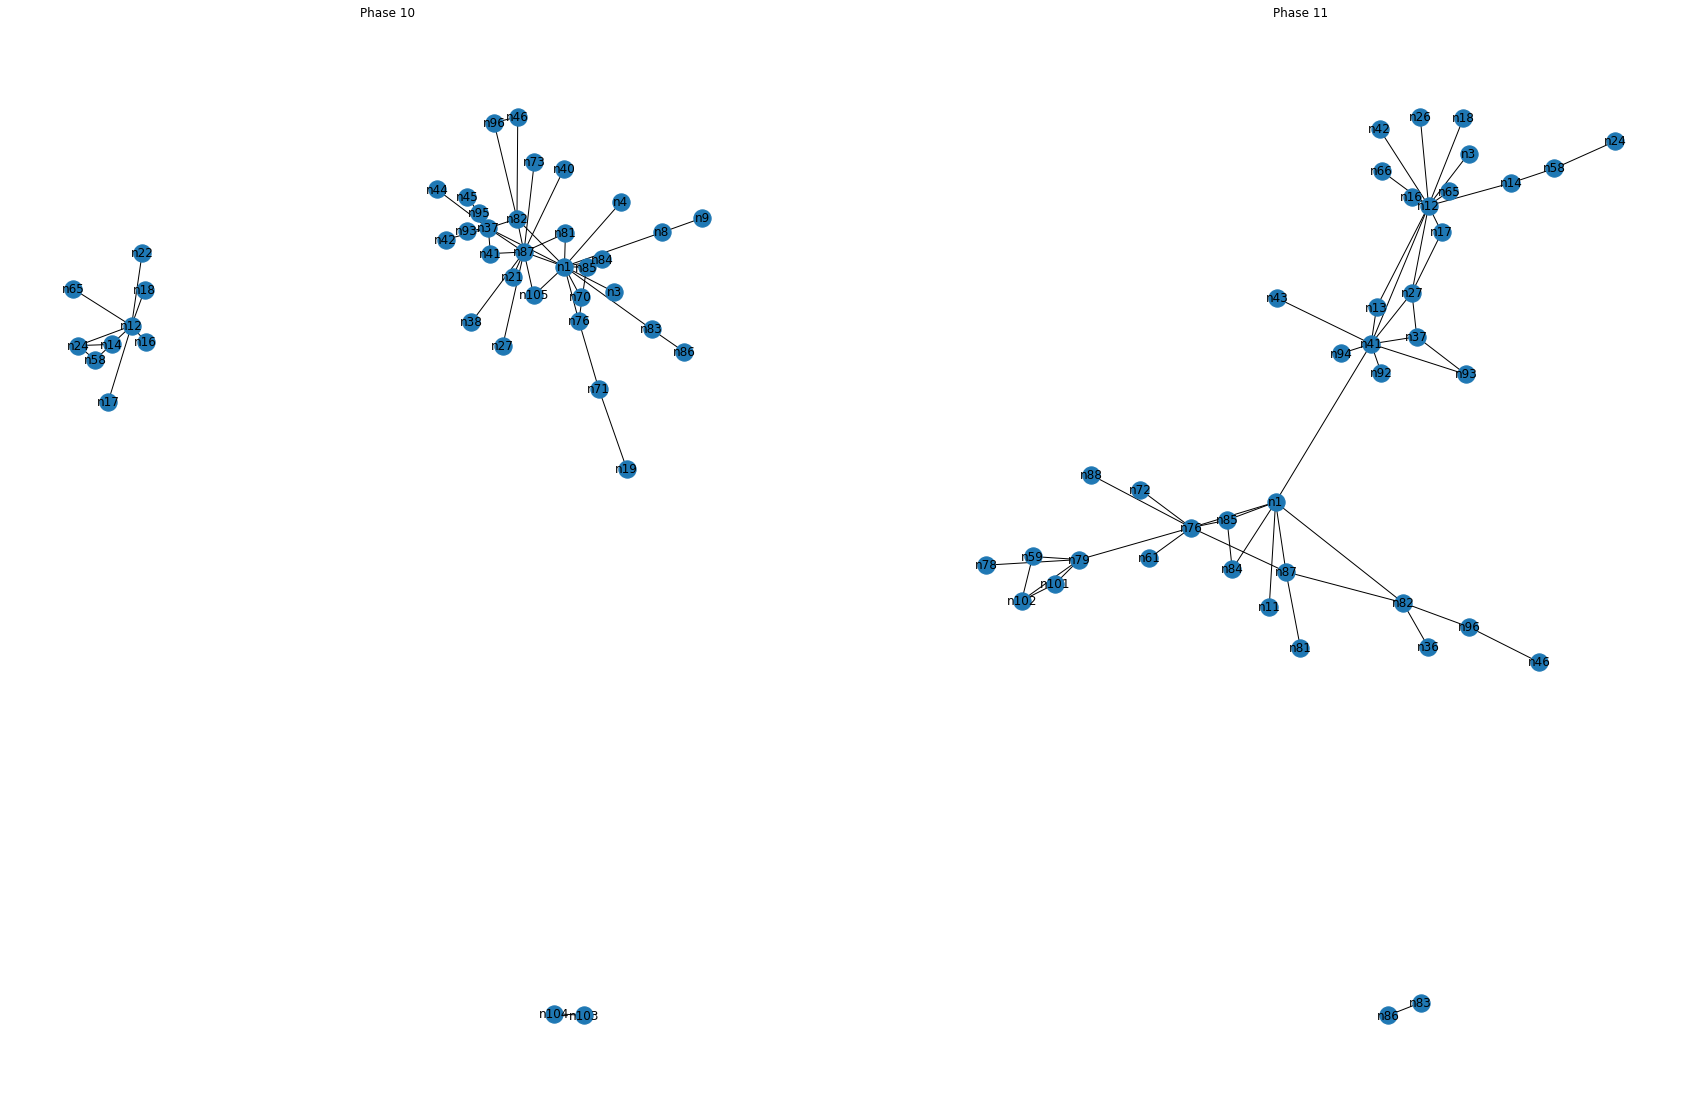

In [29]:
fig=plt.figure(figsize=(30,20))
for _ in range(10,12):
    plt.subplot(1,2,_-9)
    
    plt.title(f"Phase {_}")
    nx.draw(G[_],with_labels=True)
plt.show()

* Eigenvector centrality measures the importance of a nodes connections. 
* Looking at the top 5 most important nodes for each of the phases shows a number of important nodes that do not appear within the list of actors. 
* The highest scoring nodes from this list are n41 within phase 11 and n37 in phase 9. 
    * n41 is on the periphery of phase 10 - connections to n37 and n87 but there is a direct link between those nodes. 
    * In phase 11 41 is now directly linked to node 1 with node 1 controlling half of the network and node 41 controlling the other half.
        * n87 remains in the network and is still well connected but n1 has forged a direct link with n41 and removing that edge would disconnect the network into 2 large portions. 
    * n41 not appearing could be explained by the fact that this change occurred at the end of the investigation and there were no further wiretaps - they could also be an undercover cop.

### Using the directed graph provides more information - it shows whether an actor with high degree mainly receives or transmits information for example


In [43]:
import copy
phase_hubs=[]
phase_authorities=[]

print("Hub has important OUT links:")
for phase in range(1,12):
    (hubs,authorities) = nx.algorithms.link_analysis.hits(DiG[phase],max_iter=1000000)
    phase_hubs.append(copy.deepcopy(hubs))
    phase_authorities.append(copy.deepcopy(authorities))
    print(f"Phase {phase} hub: n1:{hubs['n1']} n3: {hubs['n3']}")
    #print(f"Phase {phase} authority: 1:{authorities['n1']} 3: {authorities['n3']}")



Hub has important OUT links:
Phase 1 hub: n1:0.7030618950308517 n3: 0.014360068778128596
Phase 2 hub: n1:0.9729551685015937 n3: 0.007635779670265445
Phase 3 hub: n1:0.7930997269333239 n3: 0.046251228739359884
Phase 4 hub: n1:0.8597937282865883 n3: 0.02396761841114808
Phase 5 hub: n1:0.9064976056936033 n3: 0.010536110446529934
Phase 6 hub: n1:0.008049138000157783 n3: 0.19528963090760404
Phase 7 hub: n1:0.00680678227433381 n3: 0.3433215969487173
Phase 8 hub: n1:0.8258784632754058 n3: 0.017379601743184727
Phase 9 hub: n1:0.5879336077883273 n3: 0.13946549710122408
Phase 10 hub: n1:1.196124158401926e-18 n3: 9.543137070166023e-19
Phase 11 hub: n1:7.931250529068974e-05 n3: 0.03789200973160775


* n1 has a high hub score for the first 5 phases, indicating that they are providing information (giving orders)
* n1 stops this role almost completely in phases 6 and 7, and n3's hub score increases greatly at this time indicating that they may have taken over this role during this period
* in phase 8 n1s hub score increases to roughly its previous level, declining by half in phase 9 and practically to 0 in phases 10 and 11 - indicating that they have stepped away from the hub role for whatever reason
* n3's hub score increases in phase 9 piossibly indicating a handover of responsibilities from n1, but then decreases to 0 in phase 10 indicating that they no longer give orders either

In [44]:
print("\n Authority has important IN links")
for phase in range(1,12):
    print(f"Phase {phase} authority: n1:{phase_authorities[phase-1]['n1']} n3: {phase_authorities[phase-1]['n3']}")


 Authority has important IN links
Phase 1 authority: n1:0.011810477352614182 n3: 0.13571432670186717
Phase 2 authority: n1:0.0002685567824653927 n3: 0.33670437902932804
Phase 3 authority: n1:0.0031526341631980133 n3: 0.14956509516014116
Phase 4 authority: n1:0.0021605476622929823 n3: 0.2754662559768093
Phase 5 authority: n1:0.000581361631633417 n3: 0.3235857319634616
Phase 6 authority: n1:0.8054190604169905 n3: 0.03209003945047813
Phase 7 authority: n1:0.7274223437930145 n3: 0.006894122926741052
Phase 8 authority: n1:0.0020381015071865394 n3: 0.46717114577731883
Phase 9 authority: n1:0.016156915061085235 n3: 0.06749387092533819
Phase 10 authority: n1:2.419828732036226e-17 n3: -3.4628594235108233e-18
Phase 11 authority: n1:9.824171226191986e-07 n3: 0.0


* When n1 ceases acting as a hub in phases 6 and 7 they switch to become an authority (i.e. receiving information, probably with a view to becoming a leader in phase 8)
* In contrast when n1 ceases acting as a hub in stages 10 and 11 they do NOT become an authority indicating that they have withdrawn from the network
* n3s authority score is higher than n1 for phases 1-5, and 8. In phase 9 n3s authority score reduces markedly and is practically 0 in phases 10 and 11
** n3 was an information gatherer for the first 5 phases and phase 8 with n1 being the clear leader. In phases 6 and 7 the reverse was true (although n3s hub score never reaches as high as n1s)
** in phase 9 the hub score for n1 and authority score for n3 both decrease, possibly indicating a change of structure during the phase
** in phase 10 and 11 neither n1 nor n3 play a hub or authority role